**Load and preprocess data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.metrics import confusion_matrix


### Load data

data = []
# "Rest" data
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLoadRest/dataLouisLoadRest0001.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLoadRest/dataLouisLoadRest0002.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLoadRest/dataMaltheLoadRest0001.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLoadRest/dataMaltheLoadRest0002.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadRest/dataNickNoLoadRest0001.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadRest/dataNickNoLoadRest0002.xls",header=None), 0])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadRest/dataNickNoLoadRest0003.xls",header=None), 0])

# No-load flexed data
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisNoLoadFlexed/dataLouisNoLoadFlexed0001.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisNoLoadFlexed/dataLouisNoLoadFlexed0002.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheNoLoadFlexed/dataMaltheNoLoadFlexed0001.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheNoLoadFlexed/dataMaltheNoLoadFlexed0002.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadFlexed/dataNickNoLoadFlexed0001.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadFlexed/dataNickNoLoadFlexed0002.xls",header=None), 1])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickNoLoadFlexed/dataNickNoLoadFlexed0003.xls",header=None), 1])

# Load 1 flexed data
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLoadFlexed/dataLouisLoadFlexed0001.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLoadFlexed/dataLouisLoadFlexed0002.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLoadFlexed/dataMaltheLoadFlexed0001.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLoadFlexed/dataMaltheLoadFlexed0002.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLoadFlexed/dataNickLoadFlexed0001.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLoadFlexed/dataNickLoadFlexed0002.xls",header=None), 2])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLoadFlexed/dataNickLoadFlexed0003.xls",header=None), 2])

# Load 2 (large load) flexed data
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLargeLoadFlexed/dataLouisLargePayload0001.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/LouisFMGdata/LouisLargeLoadFlexed/dataLouisLargePayload0002.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLargePayload/MaltheLargeLoadFlexed/dataMaltheLargeLoadfsrFlexed0001.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/MaltheFMGdata/MaltheLargePayload/MaltheLargeLoadFlexed/dataMaltheLargeLoadfsrFlexed0002.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLargeLoadFlexed/dataNickLargePayload0001.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLargeLoadFlexed/dataNickLargePayload0002.xls",header=None), 3])
data.append( [pd.read_excel("C:/Users/malth/Documents/GitHub/Transparent-control-with-LSTM-and-FMG/DNN weight Classifier/FMG band Data collector/FMG Armband code and data/FMGdata/NickFMGdata/NickLargeLoadFlexed/dataNickLargePayload0003.xls",header=None), 3])

**Combine and shuffle data**

In [2]:
# Combine into a single DataFrame
## Separate Data and labels
datax = [dat[0] for dat in data]
labels = [lab[1] for lab in data]

# Assign labels to dataframe
for i in range(len(datax)):
  datax[i]['label'] = labels[i]

datax = pd.concat(datax, ignore_index=True)


# Shuffle the data
datax = datax.sample(frac=1).reset_index(drop=True)

### Preprocess the datax
features = datax.drop('label', axis=1)
labels = datax['label']

# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

**Split and normalise data**

Split the data into initial test and training and then split into k-fold splits, essentially evaluating the data twice. Compare cross validated data with final tested data. Big difference is bad -> overfitting. Small difference is good --> unbiased fitting of model.

In [3]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Normalisation of data
mean_cols = np.mean(x_train, axis=0)
std_cols = np.std(x_train, axis=0)
                                                          # Normalization: mean = 0 and std = 1
X_train_norm_1 = (x_train - mean_cols)/std_cols         # Training set mean and std will be used for test normalization
X_test_norm_1 = (x_test - mean_cols)/std_cols           # Each column will have mean = 0 and std = 1

# SOMI are following 4 lines
X_train_sort = np.sort(X_train_norm_1, axis=1,)
X_test_sort = np.sort(X_test_norm_1, axis=1)
X_train_norm = X_train_sort/np.max(abs(X_train_sort), axis = 1)[:,None]
X_test_norm = X_test_sort/np.max(abs(X_test_sort), axis = 1)[:,None]
x_train=X_train_norm
x_test=X_test_norm

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)

**Train and cross validate data**

In [4]:
### Model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_dim=8),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(4, activation='softmax')
    ])
    # Compile the model with a lower learning rate and gradient clipping
    optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Setup callbacks for monitoring
callbacks = [
    TensorBoard(log_dir='./logs'),
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras')
]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5)

# Initialize list to store accuracy scores
accuracy_scores = []
loss_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(x_train):
    X_train, X_test = x_train[train_index], x_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]

    # Create instance of the model
    model = create_model()

    # Train the model
    model.fit(X_train, Y_train, epochs=5, validation_split=0.1, callbacks=callbacks)

    # Predict on the test set
    #y_predicted = np.argmax(model.predict(x_test),axis=1)
    #y_test_= np.argmax(y_test,axis=1)

    # Calculate accuracy and store it
    loss, accuracy = model.evaluate(X_test, Y_test)

    accuracy_scores.append(accuracy)
    loss_scores.append(loss)

# Display accuracy and loss values
print("Accuracy values:", accuracy_scores)
print("Loss values:", loss_scores)

# Display average accuracy and loss
avg_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

avg_loss = np.mean(loss_scores)
print(f"Average Loss: {avg_loss:.4f}")

C:\Users\malth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7579 - loss: 0.6099 - val_accuracy: 0.9469 - val_loss: 0.1541
Epoch 2/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9520 - loss: 0.1329 - val_accuracy: 0.9866 - val_loss: 0.0558
Epoch 3/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9822 - loss: 0.0618 - val_accuracy: 0.9890 - val_loss: 0.0380
Epoch 4/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9878 - loss: 0.0428 - val_accuracy: 0.9890 - val_loss: 0.0394
Epoch 5/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9865 - loss: 0.0463 - val_accuracy: 0.9866 - val_loss: 0.0429
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0349
Epoch 1/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7551 - loss: 0.6060 - val_accuracy: 0.9493 - val_loss: 0.1322
Epoch 2/5
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9442 - loss: 0.1404 - val_accuracy: 0.9856 - val_loss: 0.0701
Epoch 3/5
588/588 ━━━━━━━━━━━━━━━━━━

**Train model on original test data**

In [5]:
# Create instance of the model
model = create_model()

# Train the model
model.fit(x_train, y_train, epochs=10, validation_split=0.1, callbacks=callbacks)

# Calculate accuracy and loss
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


Epoch 1/10
735/735 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7589 - loss: 0.5998 - val_accuracy: 0.9422 - val_loss: 0.1343
Epoch 2/10
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9601 - loss: 0.1175 - val_accuracy: 0.9701 - val_loss: 0.0713
Epoch 3/10
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9824 - loss: 0.0580 - val_accuracy: 0.9866 - val_loss: 0.0423
Epoch 4/10
735/735 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9859 - loss: 0.0465 - val_accuracy: 0.9897 - val_loss: 0.0356
Epoch 5/10
735/735 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9789 - loss: 0.0673 - val_accuracy: 0.9939 - val_loss: 0.0223
Epoch 6/10
735/735 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9912 - val_loss: 0.0303
Epoch 7/10
735/735 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9906 - loss: 0.0346 - val_accuracy: 0.9931 - val_loss: 0.0233
Epoch 8/10
735/735 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9909 - loss: 0.0320 - val_accuracy: 0.

**Evaluate model**

350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


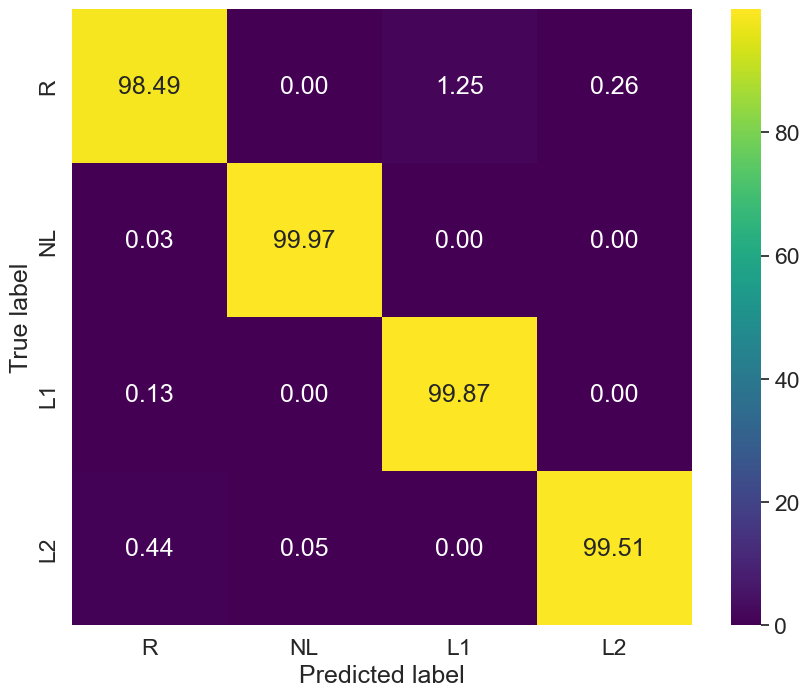

In [6]:
# Predicting the labels for the test set
y_predicted = np.argmax(model.predict(x_test), axis=1)
y_test_ = np.argmax(y_test, axis=1)

# Generating the confusion matrix
cm = confusion_matrix(y_test_, y_predicted, normalize='true')

# Convert to percentage
cm_percentage = cm * 100

sns.set(font_scale=1.5)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="viridis", xticklabels=['R', 'NL', 'L1', 'L2'], yticklabels=['R', 'NL', 'L1', 'L2'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
#plt.title('Normalized Confusion Matrix (Percentage)')
plt.savefig('ConfusionMatrix4class.svg', format='svg')
plt.show()

In [37]:
import time
import bluetooth, subprocess
nearby_devices = bluetooth.discover_devices(duration=4,lookup_names=True,flush_cache=True, lookup_class=False)
print(nearby_devices)

[('70:A6:CC:5F:8A:3D', 'AAU135046'), ('FC:F5:C4:0F:27:72', 'BIOX_AAL_Band_2772'), ('00:16:A4:69:D0:4C', 'Stratos MAXO 25/0,5-6-R7')]


In [41]:
name = "BIOX_AAL_Band_2772"     # Device name
addr = 'FC:F5:C4:0F:27:72'      # Device Address
port = 1        # RFCOMM port

# kill any "bluetooth-agent" process that is already running
subprocess.call("kill -9 `pidof bluetooth-agent`",shell=True)

# Now, connect in the same way as always with PyBlueZ
try:
    s = bluetooth.BluetoothSocket(bluetooth.RFCOMM)
    s.connect((addr,port))
except bluetooth.btcommon.BluetoothError as err:
    # Error handler
    pass
    message = '0'
    s.send(message)
    time.sleep(0.1) 

In [42]:
s.settimeout(15.0)
try:   
    message = '4'
    s.send(message)
    print(f"Sent: {message}")
    time.sleep(0.1)
    message = '5'
    s.send(message)
    time.sleep(4)
    message = '2'
    s.send(message)
    # Receiving data (blocking until something is received)
    data = s.recv(1024)  # Adjust buffer size as needed
    print(f"Received: {data.decode('utf-8')}")  # Decode bytes to string
    message = '3'
    s.send(message)
    time.sleep(4)


except bluetooth.btcommon.BluetoothError as err:
    print(f"Connection failed: {err}")


Sent: 4


OSError: Et forsøg på at oprette forbindelse mislykkedes, fordi den part, der havde oprettet forbindelse, ikke svarede korrekt efter en periode, eller en oprettet forbindelse blev afbrudt, fordi værten ikke svarede.
